In [1]:
# Quick attempt at german credit dataset.
# Imports
import numpy as np
import pandas as pd
import scorecardpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('germancredit.csv')

In [3]:
df.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [4]:
df.info()
# 8 Numerical Columns
# 13 Categorical Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Default            1000 non-null int64
checkingstatus1    1000 non-null object
duration           1000 non-null int64
history            1000 non-null object
purpose            1000 non-null object
amount             1000 non-null int64
savings            1000 non-null object
employ             1000 non-null object
installment        1000 non-null int64
status             1000 non-null object
others             1000 non-null object
residence          1000 non-null int64
property           1000 non-null object
age                1000 non-null int64
otherplans         1000 non-null object
housing            1000 non-null object
cards              1000 non-null int64
job                1000 non-null object
liable             1000 non-null int64
tele               1000 non-null object
foreign            1000 non-null object
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [5]:
df.describe()

,Default,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
sns.set_style('darkgrid')
total = float(len(df))
def with_hue(plot, feature, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    category_labels = feature.unique()
    Number_of_categories = len(category_labels)
    k = 0
    for i in category_labels:
        total = feature.value_counts()[i]
        for j in range(hue_categories):
            percentage = 100 * a[(j*Number_of_categories + k)] / total
            x = patch[(j*Number_of_categories + k)].get_x() + patch[(j*Number_of_categories + k)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + k)].get_y() + patch[(j*Number_of_categories + k)].get_height() 
            ax.text(
                (patch[(j*Number_of_categories + k)].get_x() 
                 + patch[(j*Number_of_categories + k)].get_width()),
                patch[(j*Number_of_categories + k)].get_height() + 3,
                '{:.1f}%'.format(percentage),
                ha='right'
            )
        k += 1
    plt.show()

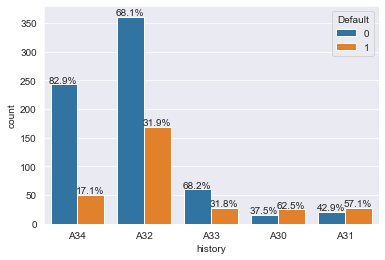

In [7]:
ax = sns.countplot(x="history", hue="Default", data=df) 
with_hue(ax, df.history, 2)
# Split changes quite a bit depending on the category
# Indicates this could be a signifcant variable

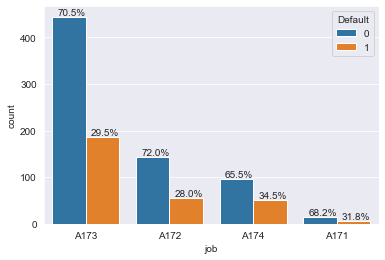

In [8]:
ax = sns.countplot(x='job', hue='Default', data=df)
with_hue(ax, df.job, 2)
# Split stays relatively the same across all categories
# Indicates that this might be an insignifcant variable

In [9]:
bins = sc.woebin(df, 'Default')

[INFO] creating woe binning ...
Binning on 1000 rows and 21 columns in 00:00:10


In [10]:
for k, bin_ in bins.items():
    print(k)
    print(bin_[['woe', 'bin_iv','total_iv']])
    
# total iv for history: 0.29183
# total iv for job: 0.008484
# Further backs up the observations from the plots above

property
        woe    bin_iv  total_iv
0 -0.461035  0.054007  0.112638
1  0.028573  0.000190  0.112638
2  0.034191  0.000391  0.112638
3  0.586082  0.058050  0.112638
checkingstatus1
        woe    bin_iv  total_iv
0 -1.176263  0.404410  0.639372
1 -0.405465  0.009461  0.639372
2  0.614204  0.225501  0.639372
savings
        woe    bin_iv  total_iv
0 -0.762140  0.142266  0.190974
1  0.139552  0.002060  0.190974
2  0.271358  0.046648  0.190974
installment
        woe    bin_iv  total_iv
0 -0.190473  0.012789  0.025569
1 -0.064539  0.000645  0.025569
2  0.157300  0.012135  0.025569
purpose
        woe    bin_iv  total_iv
0 -0.805625  0.059846  0.152924
1 -0.410063  0.042959  0.152924
2  0.279920  0.050119  0.152924
status
        woe    bin_iv  total_iv
0 -0.161641  0.016164  0.044615
1  0.235341  0.017931  0.044615
2  0.441833  0.010520  0.044615
others
        woe    bin_iv  total_iv
0 -0.587787  0.015674   0.01642
1  0.027974  0.000746   0.01642
otherplans
        woe    bin_iv  tot

In [11]:
# split into train and test set
train, test = sc.split_df(df, 'Default').values()

In [12]:
# Convert values into woe
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [13]:
y_train = train_woe.loc[:,'Default']
X_train = train_woe.loc[:,train_woe.columns != 'Default']
y_test = test_woe.loc[:,'Default']
X_test = test_woe.loc[:,train_woe.columns != 'Default']

In [14]:
# Fit logit model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Get probabilities
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

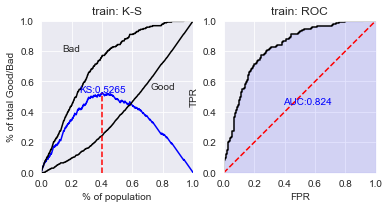

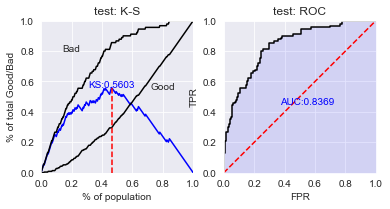

In [16]:
# Plot diagnositcs
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [17]:
# Try a subset of iv values > 0.1
for k, bin_ in bins.items():
    if bin_.total_iv[0] > 0.1:
        print(k)

property
checkingstatus1
savings
purpose
history
age
amount
duration


In [18]:
# 8 cols vs 20
cols = [
    'Default', 'property', 'age', 'amount', 'purpose', 'checkingstatus1', 
    'history', 'duration', 'savings'
]

df_new = df[cols]

In [19]:
# split into train and test set
train_new, test_new = sc.split_df(df_new, 'Default').values()
# Convert values into woe
train_woe_new = sc.woebin_ply(train_new, bins)
test_woe_new = sc.woebin_ply(test_new, bins)
y_train_new = train_woe_new.loc[:,'Default']
X_train_new = train_woe_new.loc[:,train_woe_new.columns != 'Default']
y_test_new = test_woe_new.loc[:,'Default']
X_test_new = test_woe_new.loc[:,test_woe_new.columns != 'Default']
# Fit logit model
lr_new = LogisticRegression()
lr_new.fit(X_train_new, y_train_new)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


LogisticRegression()

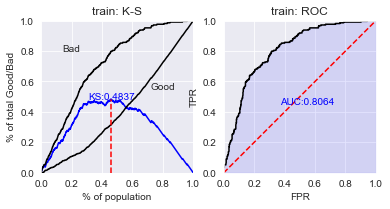

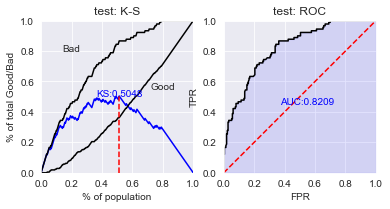

In [20]:
# Get probabilities
train_pred_new = lr_new.predict_proba(X_train_new)[:,1]
test_pred_new = lr_new.predict_proba(X_test_new)[:,1]
# Plot diagnositcs
train_perf_new = sc.perf_eva(y_train_new, train_pred_new, title = "train")
test_perf_new = sc.perf_eva(y_test_new, test_pred_new, title = "test")

In [21]:
# AUC and K-S is lower in the smaller model but only slightly.
# Going to calculate AIC 
# Get log-likelihood of each

# log_loss function returns the negative log-likelihood
# need to look into this as another package returns a different value and 
# outcome for the AIC, not sure yet which one is correct.

ll_ = log_loss(y_test, test_pred) * len(y_test)
ll_new = log_loss(y_test_new, test_pred_new) * len(y_test)

In [23]:
AIC = -2*(-ll_) + 2*20
AIC_new = -2*(-ll_new) + 2*8

In [24]:
print("AIC: " + str(AIC))
print("AIC_new: " + str(AIC_new))
# AIC for the smaller models suggests it is the "better fit" over the
# full model

AIC: 306.55374318778547
AIC_new: 291.6523471354327
